In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 cd drive/My\ Drive/

/content/drive/My Drive


In [3]:
ls

'Colab Notebooks'/   model11.h5   modelff70.h5           modelres70.h5
 logs/               model12.h5   model_plot_2ch.png     modelres80.h5
 logs2/              model21.h5   model_plot_2temp.png   modelres81.h5
 logs3/              model22.h5   model_plot_3.png       modelres82.h5
 logs4/              model30.h5   model_plot_4.png       modelsimpres70.h5
 logs5/              model31.h5   model_plot_5.png       objAPlib/
 logs6/              model33.h5   model_plot_6.png       strd.png
 logs7/              model40.h5   model_plot_7.png
 logs8/              model50.h5   model_plot_8.png
 logssimp5/          model60.h5   model_plot.png


In [4]:


import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
from keras.datasets import mnist
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.losses import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from objAPlib.utils import *
from objAPlib.BoundingBox import *
from objAPlib.BoundingBoxes import *
from objAPlib.Evaluator import *
from keras.utils.vis_utils import plot_model
from keras.callbacks import TensorBoard
import datetime
from keras.callbacks import History 
%load_ext tensorboard



## Loading Dataset

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", Y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", Y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

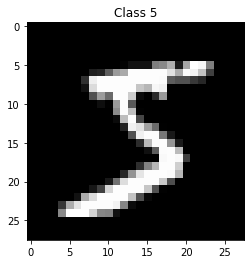

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(Y_train[0]))

## Coustom function

In [7]:
def custom_mse(y_true, y_pred):
 
    loss = Multiply()([K.square(y_pred - y_true),K.expand_dims(y_true[:,:,:,10],axis=-1)])  # (batch_size, 2)
    loss = K.sum(loss)        # (batch_size,)
    
    return loss
def cus_maxpoolf(x):

  x = K.expand_dims(x)
  x = MaxPooling3D(pool_size=(1,1,4))(x)
  x = K.squeeze(x, axis=-1)

  return x
def cuss_maxpoolf(x):

  x = K.expand_dims(x)
  x = MaxPooling3D(pool_size=(1,1,2))(x)
  x = K.squeeze(x, axis=-1)

  return x
def lintanh(x):
    """ coustom function made by Mahesh """

    return K.tanh(x) + x

## Different Networks

Standard Network

In [9]:
def net(input_size = (28*4,28*4,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv3 = Conv2D(128, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv3 = Conv2D(128, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = Conv2D(15, (3,3), activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(conv3)

    model = Model(inputs = inputs, outputs = conv3)

    model.compile(optimizer = Adam(lr = 1e-4), loss = custom_mse, metrics = ['mean_absolute_error'])
    
    model.summary()

    return model

model = net()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 112, 112, 1)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 32)      320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 56, 56, 64)       

My Network

In [ ]:
def net(input_size = (28*4,28*4,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    #X=Convolution2D(128, (1, 1), activation='relu', padding = 'same', kernel_initializer = 'he_normal')(X)       use this bro
    pconv3 = Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    pconv3x = Conv2D(32, (9,1), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    pconv3y = Conv2D(32, (1,9), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Concatenate()([Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pconv3),Conv2D(16, (1,1), activation = 'relu', padding = 'same')(pconv3x),Conv2D(16, (1,1), activation = 'relu', padding = 'same')(pconv3y)])
    conv3x = Concatenate()([Conv2D(16, (9,1), activation = lintanh, padding = 'same', kernel_initializer = 'he_normal')(pconv3x),Conv2D(16, (1,1), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pconv3)])
    conv3y = Concatenate()([Conv2D(16, (1,9), activation = lintanh, padding = 'same', kernel_initializer = 'he_normal')(pconv3y),Conv2D(16, (1,1), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pconv3)])
    pconv3 = conv3
    pconv3x = Add()([conv3x,pconv3x])
    pconv3y = Add()([conv3y,pconv3y])
    conv3 = Concatenate()([Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pconv3),Conv2D(16, (1,1), activation = 'relu', padding = 'same')(pconv3x),Conv2D(16, (1,1), activation = 'relu', padding = 'same')(pconv3y)])
    conv3x = Concatenate()([Conv2D(16, (9,1), activation = lintanh, padding = 'same', kernel_initializer = 'he_normal')(pconv3x),Conv2D(16, (1,1), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pconv3)])
    conv3y = Concatenate()([Conv2D(16, (1,9), activation = lintanh, padding = 'same', kernel_initializer = 'he_normal')(pconv3y),Conv2D(16, (1,1), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pconv3)])
    conv3 = conv3
    conv3x = Add()([conv3x,pconv3x])
    conv3y = Add()([conv3y,pconv3y])
    pconv3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pconv3x = Conv2D(64,(2,2), strides=(2,2) ,activation = 'relu', padding = 'valid')(conv3x)
    pconv3y = Conv2D(64,(2,2), strides=(2,2) ,activation = 'relu', padding = 'valid')(conv3y)
    conv3 = Concatenate()([Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pconv3),Conv2D(32, (1,1), activation = 'relu', padding = 'same')(pconv3x),Conv2D(32, (1,1), activation = 'relu', padding = 'same')(pconv3y)])
    conv3x = Concatenate()([Conv2D(32, (9,1), activation = lintanh, padding = 'same', kernel_initializer = 'he_normal')(pconv3x),Lambda(lambda x: cuss_maxpoolf(x))(pconv3)])
    conv3y = Concatenate()([Conv2D(32, (1,9), activation = lintanh, padding = 'same', kernel_initializer = 'he_normal')(pconv3y),Lambda(lambda x: cuss_maxpoolf(x))(pconv3)])
    pconv3 = conv3
    pconv3x = Add()([conv3x,pconv3x])
    pconv3y = Add()([conv3y,pconv3y])
    conv3 = Concatenate()([Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pconv3),Conv2D(32, (1,1), activation = 'relu', padding = 'same')(pconv3x),Conv2D(32, (1,1), activation = 'relu', padding = 'same')(pconv3y)])
    conv3x = Concatenate()([Conv2D(32, (9,1), activation = lintanh, padding = 'same', kernel_initializer = 'he_normal')(pconv3x),Lambda(lambda x: cus_maxpoolf(x))(pconv3)])
    conv3y = Concatenate()([Conv2D(32, (1,9), activation = lintanh, padding = 'same', kernel_initializer = 'he_normal')(pconv3y),Lambda(lambda x: cus_maxpoolf(x))(pconv3)])
    pconv3 = conv3
    pconv3x = Add()([conv3x,pconv3x])
    pconv3y = Add()([conv3y,pconv3y])
    conv3 = Concatenate()([pconv3,pconv3x,pconv3y])
    conv3 = Conv2D(11, (1,1), activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3x = Conv2D(2, (1,1), activation = 'sigmoid', padding = 'same')(pconv3x)
    conv3y = Conv2D(2, (1,1), activation = 'sigmoid', padding = 'same')(pconv3y)
    pconv3 = conv3
    pconv3x = conv3x
    pconv3y = conv3y
    conv3 = Concatenate()([pconv3,pconv3x,pconv3y])

    model = Model(input = inputs, output = conv3)

    model.compile(optimizer = Adam(lr = 1e-4), loss = custom_mse, metrics = ['mean_absolute_error'])
    
    model.summary()

    return model

model = net()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 112, 112, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 112, 112, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 112, 112, 32) 9248        conv2d_2[0][0]                   
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [ ]:
plot_model(model, to_file='model_plot_8.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.load_weights("modelres82.h5")

In [ ]:
logdir = os.path.join("logs8", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)


In [ ]:
history = History()

In [ ]:
sets = 10000
for i in range(1):
  x_test = np.zeros([sets,X_test.shape[1]*4,X_test.shape[2]*4])
  y_test = np.zeros([sets,14,14,15])
  y_test[:,:,:,0:10] = 0.1
  y_test[:,:,:,10] = 0.1
  for j in range(sets):
    nm = np.random.randint(1,5)
    for k in range(nm):
      ii = np.random.randint(0,X_test.shape[0])
      sf = np.random.randint(28*0.5,28*2)
      rimg = cv2.resize(X_test[ii],(sf,sf),cv2.INTER_LINEAR)
      sa = np.random.randint(0,(x_test.shape[1]-sf))
      sb = np.random.randint(0,(x_test.shape[2]-sf))
      x_test[j, sa:sa+sf , sb:sb+sf] += rimg
      temp = np.zeros(rimg.shape)
      temp[rimg>100] = 1
      tempx = np.sum(temp,axis=1)
      tempx[tempx>1]=1
      a1 = np.argmax(tempx)
      a2 = sf - np.argmax(tempx[::-1]) -1
      tempx = np.sum(temp,axis=0)
      tempx[tempx>1]=1
      b1 = np.argmax(tempx)
      b2 = sf - np.argmax(tempx[::-1]) -1
      ai  = (int)((sa+sa+a1+a2)*(7/x_test.shape[1]))
      bi = (int)((sb+sb+b1+b2)*(7/x_test.shape[2]))
      y_test[j][ai][bi][10] = 1
      y_test[j][ai][bi][Y_test[ii]] = 1
      y_test[j][ai][bi][11] = ((sa+sa+a1+a2)*(7/x_test.shape[1])) - ai
      y_test[j][ai][bi][13] = ((sb+sb+b1+b2)*(7/x_test.shape[2])) - bi
      y_test[j][ai][bi][12] = (a2-a1)/(28*2)
      y_test[j][ai][bi][14] = (b2-b1)/(28*2)
  np.clip(x_test,0,255)
  x_test = x_test[:,:,:,np.newaxis]
  x_test = x_test.astype('float32')
  x_test/=255

In [ ]:
model.compile(optimizer = Adam(lr = 1e-6), loss = custom_mse, metrics = ['mean_absolute_error'])

In [ ]:
minv = 1000.01
sets = 30000
for i in range(5):
  x_train = np.zeros([sets,X_train.shape[1]*4,X_train.shape[2]*4])
  y_train = np.zeros([sets,14,14,15])
  y_train[:,:,:,0:10] = 0.1
  y_train[:,:,:,10] = 0.1
  for j in range(sets):
    nm = np.random.randint(1,5)
    for k in range(nm):
      ii = np.random.randint(0,X_train.shape[0])
      sf = np.random.randint(28*0.5,28*2)
      rimg = cv2.resize(X_train[ii],(sf,sf),cv2.INTER_LINEAR)
      sa = np.random.randint(0,(x_train.shape[1]-sf))
      sb = np.random.randint(0,(x_train.shape[2]-sf))
      x_train[j, sa:sa+sf , sb:sb+sf] += rimg
      temp = np.zeros(rimg.shape)
      temp[rimg>100] = 1
      tempx = np.sum(temp,axis=1)
      tempx[tempx>1]=1
      a1 = np.argmax(tempx)
      a2 = sf - np.argmax(tempx[::-1]) -1
      tempx = np.sum(temp,axis=0)
      tempx[tempx>1]=1
      b1 = np.argmax(tempx)
      b2 = sf - np.argmax(tempx[::-1]) -1
      ai  = (int)((sa+sa+a1+a2)*(7/x_train.shape[1]))
      bi = (int)((sb+sb+b1+b2)*(7/x_train.shape[2]))
      y_train[j][ai][bi][10] = 1
      y_train[j][ai][bi][Y_train[ii]] = 1
      y_train[j][ai][bi][11] = ((sa+sa+a1+a2)*(7/x_train.shape[1])) - ai
      y_train[j][ai][bi][13] = ((sb+sb+b1+b2)*(7/x_train.shape[2])) - bi
      y_train[j][ai][bi][12] = (a2-a1)/(28*2)
      y_train[j][ai][bi][14] = (b2-b1)/(28*2)
  np.clip(x_train,0,255)
  x_train = x_train[:,:,:,np.newaxis]
  x_train = x_train.astype('float32')
  x_train/=255
  #model.fit(x_train, y_train, batch_size=128, nb_epoch=1, callbacks=[tensorboard_callback], validation_data=(x_test,y_test))
  his = model.fit(x_train, y_train, batch_size=128, nb_epoch=1, callbacks=[history,tensorboard_callback], validation_data=(x_test,y_test))
  #model.fit(x_train, y_train, batch_size=32, nb_epoch=1)
  #model.save_weights("modelff70.h5")
  print(i)
  if(his.history['val_loss'][0]<minv):
    minv = his.history['val_loss'][0]
    model.save_weights("modelres82.h5")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 30000 samples, validate on 5000 samples
Epoch 1/1
30000/30000 [==============================] - 154s 5ms/step - loss: 27.3679 - mean_absolute_error: 0.0018 - val_loss: 28.0330 - val_mean_absolute_error: 0.0017
0
Train on 30000 samples, validate on 5000 samples
Epoch 1/1
30000/30000 [==============================] - 151s 5ms/step - loss: 26.9015 - mean_absolute_error: 0.0017 - val_loss: 27.9949 - val_mean_absolute_error: 0.0017
1
Train on 30000 samples, validate on 5000 samples
Epoch 1/1
30000/30000 [==============================] - 151s 5ms/step - loss: 26.0661 - mean_absolute_error: 0.0017 - val_loss: 28.0240 - val_mean_absolute_error: 0.0017
2
Train on 30000 samples, validate on 5000 samples
Epoch 1/1
30000/30000 [==============================] - 151s 5ms/step - loss: 26.4233 - mean_absolute_error: 0.0017 - val_loss: 28.0394 - val_mean_absolute_error: 0.0017
3


KeyboardInterrupt: ignored

In [ ]:
%tensorboard --logdir logs5

In [ ]:
model.save_weights("model21.h5")

In [ ]:
pred = model.predict(x_test)

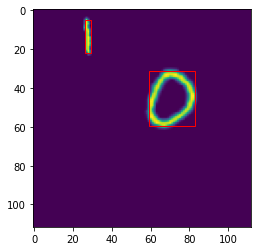

In [ ]:

idd = 13
res  = pred[idd]
resimg = x_test[idd,:,:,0]
plt.imshow(resimg)
ax = plt.gca()
for rxi in range(res.shape[0]):
  for ryi in range(res.shape[1]):
    if(res[rxi, ryi, 10]>0.5):
      hit = res[rxi, ryi, 12]*(28*2)
      wid = res[rxi, ryi, 14]*(28*2)
      ycc = (rxi+res[rxi, ryi, 11])*(x_test.shape[1]/14)
      xcc = (ryi+res[rxi, ryi, 13])*(x_test.shape[2]/14)
      rect = Rectangle((xcc-(wid/2),ycc-(hit/2)),wid,hit,linewidth=1,edgecolor='r',facecolor='none')
      ax.add_patch(rect)
plt.show()

In [ ]:
def bboxes_iou(boxes1, boxes2):

    boxes1 = np.array(boxes1)
    boxes2 = np.array(boxes2)

    boxes1_area = (boxes1[..., 2] - boxes1[..., 0]) * (boxes1[..., 3] - boxes1[..., 1])
    boxes2_area = (boxes2[..., 2] - boxes2[..., 0]) * (boxes2[..., 3] - boxes2[..., 1])

    left_up       = np.maximum(boxes1[..., :2], boxes2[..., :2])
    right_down    = np.minimum(boxes1[..., 2:], boxes2[..., 2:])

    inter_section = np.maximum(right_down - left_up, 0.0)
    inter_area    = inter_section[..., 0] * inter_section[..., 1]
    union_area    = boxes1_area + boxes2_area - inter_area
    ious          = np.maximum(1.0 * inter_area / union_area, np.finfo(np.float32).eps)

    return ious

  
def nms(bboxes, iou_threshold, sigma=0.3, method='nms'):
    """
    :param bboxes: (xmin, ymin, xmax, ymax, score, class)

    """
    bboxes = np.array(bboxes)
    classes_in_img = list(set(bboxes[:, 5]))
    best_bboxes = []

    for cls in classes_in_img:
        cls_mask = (bboxes[:, 5] == cls)
        cls_bboxes = bboxes[cls_mask]

        while len(cls_bboxes) > 0:
            max_ind = np.argmax(cls_bboxes[:, 4])
            best_bbox = cls_bboxes[max_ind]
            best_bboxes.append(best_bbox)
            cls_bboxes = np.concatenate([cls_bboxes[: max_ind], cls_bboxes[max_ind + 1:]])
            iou = bboxes_iou(best_bbox[np.newaxis, :4], cls_bboxes[:, :4])
            weight = np.ones((len(iou),), dtype=np.float32)

            assert method in ['nms', 'soft-nms']

            if method == 'nms':
                iou_mask = iou > iou_threshold
                weight[iou_mask] = 0.0

            if method == 'soft-nms':
                weight = np.exp(-(1.0 * iou ** 2 / sigma))

            cls_bboxes[:, 4] = cls_bboxes[:, 4] * weight
            score_mask = cls_bboxes[:, 4] > 0.
            cls_bboxes = cls_bboxes[score_mask]

    return best_bboxes

In [ ]:
allBoundingBoxes = BoundingBoxes()
evaluator = Evaluator()
for i in range(y_test.shape[0]):
  res  = pred[i]
  boxes = []
  for rxi in range(res.shape[0]):
    for ryi in range(res.shape[1]):
      if(res[rxi, ryi, 10]>0.5):
        hit = res[rxi, ryi, 12]*(28*2)
        wid = res[rxi, ryi, 14]*(28*2)
        ycc = (rxi+res[rxi, ryi, 11])*(x_test.shape[1]/14)
        xcc = (ryi+res[rxi, ryi, 13])*(x_test.shape[2]/14)
        classn = np.argmax(res[rxi, ryi, 0:10])
        boxes.append([xcc-(wid/2),ycc-(hit/2),xcc+(wid/2),ycc+(hit/2),res[rxi, ryi, 10],classn])
  boxes = nms(boxes, 0.75)
  for box in boxes:
      bb = BoundingBox(imageName=str(i), classId=str(int(box[5])), classConfidence=box[4],
                       x=box[0], y=box[1], w=box[2], h=box[3], typeCoordinates=CoordinatesType.Absolute,
                       bbType=BBType.Detected, format=BBFormat.XYX2Y2, imgSize=(28*4,28*4))
      allBoundingBoxes.addBoundingBox(bb)
  res  = y_test[i]
  bboxes = []
  for rxi in range(res.shape[0]):
    for ryi in range(res.shape[1]):
      if(res[rxi, ryi, 10]>0.5):
        hit = res[rxi, ryi, 12]*(28*2)
        wid = res[rxi, ryi, 14]*(28*2)

        ycc = (rxi+res[rxi, ryi, 11])*(x_test.shape[1]/14)
        xcc = (ryi+res[rxi, ryi, 13])*(x_test.shape[2]/14)
        classn = np.argmax(res[rxi, ryi, 0:10])
        bboxes.append([xcc-(wid/2),ycc-(hit/2),xcc+(wid/2),ycc+(hit/2),res[rxi, ryi, 10],classn])
  for box in bboxes:
      bb = BoundingBox(imageName=str(i), classId=str(int(box[5])), 
                       x=box[0], y=box[1], w=box[2], h=box[3], typeCoordinates=CoordinatesType.Absolute,
                       bbType=BBType.GroundTruth, format=BBFormat.XYX2Y2, imgSize=(28*4,28*4))
      allBoundingBoxes.addBoundingBox(bb)
summ = 0
for cval in range(10):
  metricsPerClass = evaluator.GetPascalVOCMetrics(allBoundingBoxes, IOUThreshold=(0.5 + (cval*0.05)))
  for ic in range(10):
    summ+=metricsPerClass[ic]['AP']
summ /= 100
print(summ)

0.7349927380276996



standard   
0.7562680444280496__ 0.08742110313501476__ 0.09628579563651604   
0.7565964236051111__ 0.08624292224147725__ 0.09448569565777878 big      
0.7268383121938284__ 0.08622878669204864__ 0.09655459852328223 small             
0.7890260864605857__ 0.09015215266704328__ 0.09693236794441021 medium

My Network               
0.7707191624848125__0.08818102489633482__0.09573180963509968                     
0.7496481088994155__0.08465250122271523__0.09382762556050947   big                  
0.7564469307038111__0.08838250910889228__0.09644121557447721 small       
0.8036886244047231__0.09054609472098427__0.09671366155364866 medium
